Veri seti başarıyla yüklendi!

--- MODEL SONUÇLARI (Tablo 4.1 İçin) ---
Logistic Regression Doğruluk Oranı: %75.32
KNN Doğruluk Oranı: %74.03
Random Forest Doğruluk Oranı: %75.32

'korelasyon.png' oluşturuldu.


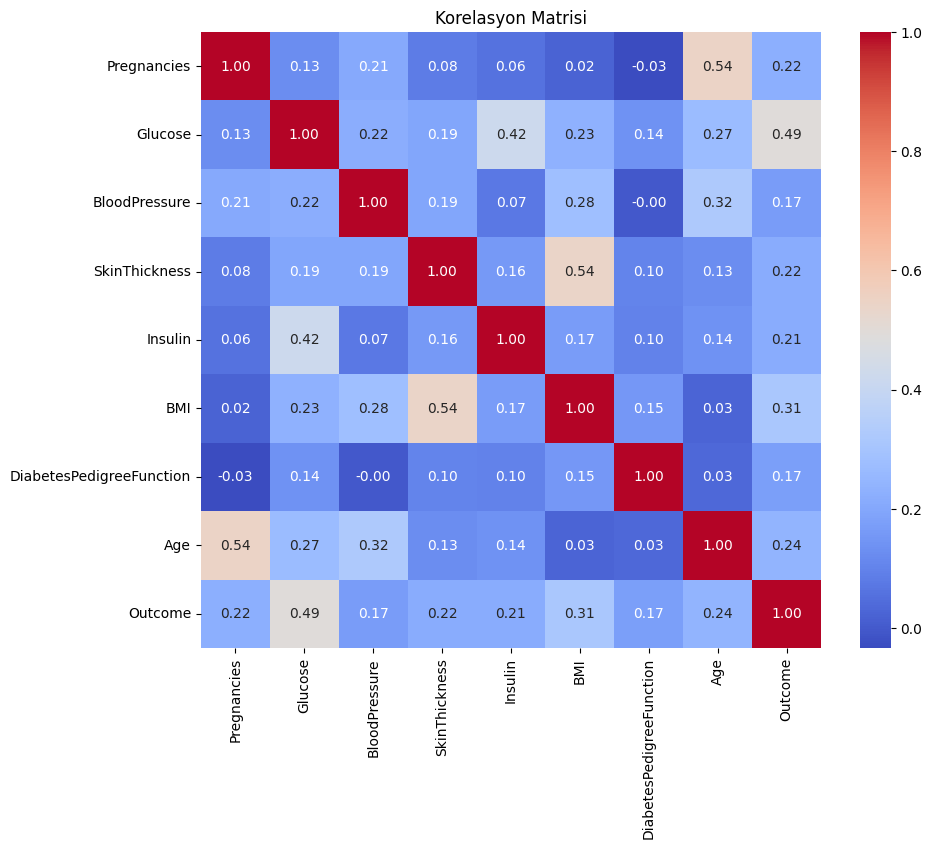

'confusion_matrix.png' oluşturuldu.


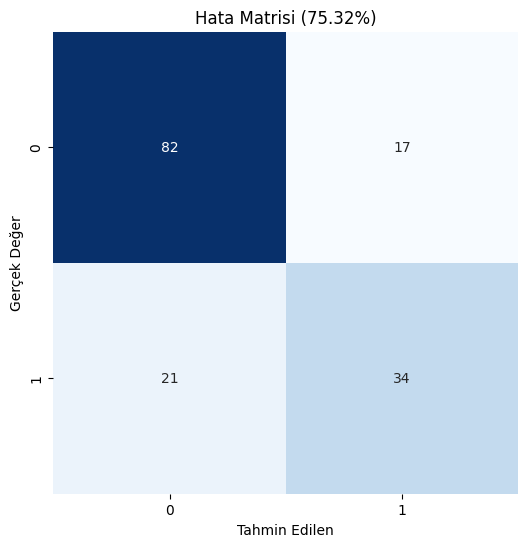


İŞLEM TAMAM! Şimdi sol taraftaki dosyalar kısmından resimleri indirebilirsin.


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

try:
    df = pd.read_csv('diabetes.csv')
    print("Veri seti başarıyla yüklendi!")
except FileNotFoundError:
    print("HATA: 'diabetes.csv' dosyası bulunamadı.")

sutunlar = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in sutunlar:

    df[col] = df[col].replace(0, np.nan)
    df[col] = df[col].fillna(df[col].mean())

X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

print("\n--- MODEL SONUÇLARI (Tablo 4.1 İçin) ---")
best_model = None
best_accuracy = 0
best_pred = None

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Doğruluk Oranı: %{acc*100:.2f}")

    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_pred = y_pred


plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Korelasyon Matrisi")
plt.savefig('korelasyon.png')
print("\n'korelasyon.png' oluşturuldu.")
plt.show()

cm = confusion_matrix(y_test, best_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f"Hata Matrisi ({best_accuracy*100:.2f}%)")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.savefig('confusion_matrix.png')
print("'confusion_matrix.png' oluşturuldu.")
plt.show()

print("\nİŞLEM TAMAM!")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')